###Activation Functions

tanh activation

In [37]:
def tanh(x):
    # Compute tanh activation
    t = np.tanh(x)
    return t



ReLU activation

In [38]:
def relu(x):
    # Compute ReLU activation
    r = np.maximum(0, x)
    return r



Softmax activation

In [39]:
def softmax(z):
    # Numerical stability
    z_stable = z - np.max(z, axis=0, keepdims=True)

    # Exponentiation
    exp_z = np.exp(z_stable)

    # Sum of exponentials
    sum_exp_z = np.sum(exp_z, axis=0, keepdims=True)

    # Softmax probabilities
    a = exp_z / sum_exp_z

    return a



###Activation Function Derivatives

Derivative of tanh

In [40]:
def derivative_tanh(x):
    # Compute tanh(x)
    t = np.tanh(x)

    # Compute derivative: 1 - tanh^2(x)
    dt = 1 - np.power(t, 2)

    return dt



Derivative of ReLU

In [41]:
def derivative_relu(x):
    # Initialize derivative array with zeros
    dr = np.zeros_like(x)

    # Set derivative to 1 where x > 0
    dr[x > 0] = 1

    return dr



###Initialize Parameters

In [42]:
def initialize_parameters(n_x, n_h, n_y):

    w1 = 0.001 * np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))

    w2 = 0.001 * np.random.randn(n_y, n_h)
    b2 = np.zeros((n_y, 1))

    parameters = {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2
    }

    return parameters


###Forward Propagation

In [43]:
def forward_prop(x, parameters):

    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)        # or tanh(z1)

    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)

    forward_cache = {
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "a2": a2
    }

    return forward_cache


###Cost Function

In [44]:
def cost_function(a2, y):

    m = y.shape[1]
    cost = - (1 / m) * np.sum(y * np.log(a2 + 1e-8))

    return cost


###Backward Propagation

In [45]:
def backward_prop(x, y, parameters, forward_cache):

    m = x.shape[1]

    w2 = parameters['w2']

    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    z1 = forward_cache['z1']

    # Output layer
    dz2 = a2 - y
    dw2 = (1 / m) * np.dot(dz2, a1.T)
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)

    # Hidden layer
    dz1 = np.dot(w2.T, dz2) * derivative_relu(z1)   # or derivative_tanh(z1)
    dw1 = (1 / m) * np.dot(dz1, x.T)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)

    gradients = {
        "dw1": dw1,
        "db1": db1,
        "dw2": dw2,
        "db2": db2
    }

    return gradients


###Update Parameters

In [55]:
def update_parameters(parameters, gradients, learning_rate):

    # Fetching our parameters
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']

    # Fetching our gradients
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']

    ## Update rule ##
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2

    Parameters = {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2
    }

    return Parameters




###Complete Model

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd



In [71]:
def model(x, y, n_h, learning_rate, iterations):

    ## Input & Output sizes ##
    n_x = x.shape[0]      # number of input features
    n_y = y.shape[0]      # number of output classes

    cost_list = []

    ## Initialize parameters ##
    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(iterations):

        # Forward Propagation
        forward_cache = forward_prop(x, parameters)
        a2 = forward_cache['a2']

        # Cost Function
        cost = cost_function(a2, y)

        # Backward propagation
        gradients = backward_prop(x, y, parameters, forward_cache)

        # Update Parameters
        parameters = update_parameters(parameters, gradients, learning_rate)

        cost_list.append(cost)

        if i % (iterations // 10) == 0:
            print("cost after", i, "iters is", cost)

    return parameters, cost_list





In [72]:
n_h = 64
learning_rate = 0.1
iterations = 1000




In [73]:
(X_train_raw, Y_train_raw), (X_test_raw, Y_test_raw) = tf.keras.datasets.mnist.load_data()

# Reshape and normalize training data
X_train = X_train_raw.reshape(X_train_raw.shape[0], -1).T / 255.0
Y_train = np.eye(10)[Y_train_raw].T

# Reshape and normalize test data
X_test = X_test_raw.reshape(X_test_raw.shape[0], -1).T / 255.0
Y_test = np.eye(10)[Y_test_raw].T

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_test: {Y_test.shape}")

x = X_train
y = Y_train

Shape of X_train: (784, 60000)
Shape of Y_train: (10, 60000)
Shape of X_test: (784, 10000)
Shape of Y_test: (10, 10000)


In [74]:
Parameters, Cost_list = model(
    x,
    y,
    n_h=n_h,
    learning_rate=learning_rate,
    iterations=iterations
)



cost after 0 iters is 2.3025801331465727
cost after 100 iters is 2.098968248652751
cost after 200 iters is 0.7692118547995638
cost after 300 iters is 0.5126025414015725
cost after 400 iters is 0.4283174004262039
cost after 500 iters is 0.3870231186044798
cost after 600 iters is 0.3605931312640989
cost after 700 iters is 0.34093329792419386
cost after 800 iters is 0.32517698527586014
cost after 900 iters is 0.3119591955225456


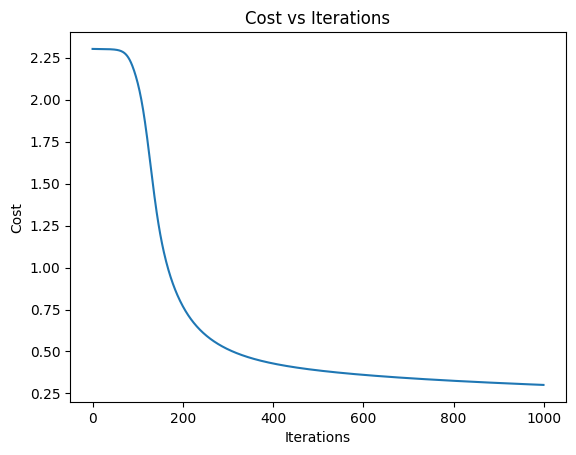

In [75]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()




###Checking Accuracy

In [76]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_prop(inp, parameters)
    a_out = forward_cache['a2']

    a_out = np.argmax(a_out, 0)
    labels = np.argmax(labels, 0)

    acc = np.mean(a_out == labels) * 100
    return acc




In [77]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")




Accuracy of Train Dataset 91.44166666666666 %
Accuracy of Test Dataset 91.63 %


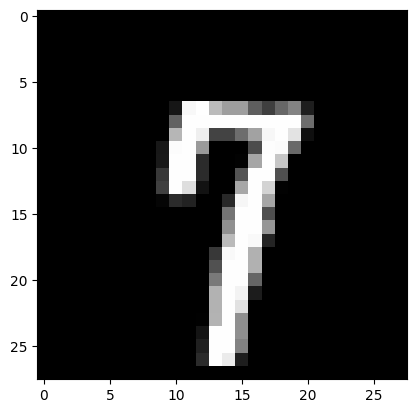

Our model says it is : 7


In [78]:
import random

idx = int(random.randrange(0, X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28, 28)), cmap='gray')
plt.show()

cache = forward_prop(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])

